In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from xgboost import XGBClassifier

In [2]:
pd.options.display.max_columns=1000
sns.set_theme()

In [3]:
df = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/df.csv')

In [4]:
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len,is_ninjago
0,001-1,Gears,1965,1,43,5,5,Technic,24696,132a,7,4,Light Gray,Tyre Smooth Old Style - Small,0,7,4,10,29,0
1,001-1,Gears,1965,1,43,5,5,Technic,24696,3020,15,4,White,Plate 2 x 4,0,7,4,5,11,0
2,001-1,Gears,1965,1,43,5,5,Technic,24696,3062c,15,1,White,"Brick Round 1 x 1 Solid Stud, No Bottom Groove",0,7,5,5,46,0
3,001-1,Gears,1965,1,43,5,5,Technic,24696,3404bc01,15,4,White,"Turntable 4 x 4 - Old Type Complete, Perfectly...",0,7,8,5,52,0
4,001-1,Gears,1965,1,43,5,5,Technic,24696,36,7,4,Light Gray,Tyre Smooth Old Style - Large,0,7,2,10,29,0


In [5]:
df.shape

(919288, 20)

In [6]:
df.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'set_num_len',
       'set_name_len', 'theme_name', 'id', 'part_num', 'color_id', 'quantity',
       'color_name', 'part_name', 'is_trans', 'theme_name_len', 'part_num_len',
       'color_name_len', 'part_name_len', 'is_ninjago'],
      dtype='object')

In [7]:
target_names = 'set_num set_name theme_id num_parts set_num_len set_name_len theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()
target_names

['set_num',
 'set_name',
 'theme_id',
 'num_parts',
 'set_num_len',
 'set_name_len',
 'theme_name',
 'id',
 'part_num',
 'color_name',
 'part_name',
 'theme_name_len',
 'is_ninjago']

In [8]:
model = LogisticRegression()

In [9]:
fn_under = list()
for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn_under.append(name)

In [10]:
fn_under

['year',
 'color_id',
 'quantity',
 'is_trans',
 'part_num_len',
 'color_name_len',
 'part_name_len']

In [11]:
X = df[fn_under]
y = df['is_ninjago']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

In [13]:
df_train = pd.concat([pd.DataFrame(X_train, columns=fn_under), pd.DataFrame(y_train, columns=['is_ninjago'])], axis=1)

In [14]:
df_test = pd.concat([pd.DataFrame(X_test, columns=fn_under), pd.DataFrame(y_test, columns=['is_ninjago'])], axis=1)

In [15]:
print(df_train.shape)
print(df_test.shape)

(827359, 8)
(91929, 8)


In [16]:
df_grouped_train = df_train.groupby('is_ninjago')

df_grouped_train.head()

,year,color_id,quantity,is_trans,part_num_len,color_name_len,part_name_len,is_ninjago
774631,2014,15,1,0,11,5,59,0
417226,2013,0,1,0,5,5,45,0
414960,2010,0,1,0,5,5,57,0
896798,2008,0,2,0,4,5,12,0
591153,2007,70,3,0,6,13,53,0
555268,2016,2,3,0,4,5,11,1
575778,2015,19,1,0,5,3,27,1
576490,2015,0,1,0,6,5,54,1
612760,2020,27,8,0,4,4,33,1
567503,2019,0,2,0,5,5,43,1


In [17]:
print(df_grouped_train.size())

is_ninjago
0    795565
1     31794
dtype: int64


In [18]:
list(df_grouped_train)[0][1]

lengths = []

for is_ninjago, group in df_grouped_train:
    lengths.append(group.shape[0])
    
print(lengths)

[795565, 31794]


In [19]:
dfs_train = list()

for is_ninjago, group in df_grouped_train:
    dfs_train.append(group.sample(min(lengths)))
    
dfs_train

[        year  color_id  quantity  is_trans  part_num_len  color_name_len  \
 169883  2019         1         2         0             5               4   
 112193  2015        15         4         0             4               5   
 170514  2019        28         1         0             4               8   
 435096  2016        70         1         0             4              13   
 865906  2000         2         2         0            11               5   
 ...      ...       ...       ...       ...           ...             ...   
 886668  2012        72         6         0             4              16   
 193648  2001         1         1         0             5               4   
 912690  2015        15         5         0             5               5   
 79010   2000         0         1         0             4               5   
 286953  2020        70         1         0             5              13   
 
         part_name_len  is_ninjago  
 169883             22           0  


In [20]:
df_balancedbyunder = pd.concat(dfs_train)
df_balancedbyunder.head()

,year,color_id,quantity,is_trans,part_num_len,color_name_len,part_name_len,is_ninjago
169883,2019,1,2,0,5,4,22,0
112193,2015,15,4,0,4,5,11,0
170514,2019,28,1,0,4,8,11,0
435096,2016,70,1,0,4,13,11,0
865906,2000,2,2,0,11,5,46,0


In [21]:
df_balancedbyunder.shape

(63588, 8)

In [22]:
hyper_table_df_grouped = list()
fn_under = list()

for i, name in tqdm(enumerate(df_balancedbyunder.columns), total=len(df_balancedbyunder.columns)-1):
    if i > 100:
        break
    if name in target_names:
        continue
    fn_under.append(name)
    model.fit(df_balancedbyunder[fn_under], df_balancedbyunder['is_ninjago'])
    
    s_train = model.score(df_balancedbyunder[fn_under], df_balancedbyunder['is_ninjago'])
    s_test = model.score(df_test[fn_under], df_test['is_ninjago'])
    y_pred = model.predict(df_test[fn_under])

    conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

    precision = precision_score(df_test['is_ninjago'], y_pred)
    recall = recall_score(df_test['is_ninjago'], y_pred)
    accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
    f1 = f1_score(df_test['is_ninjago'], y_pred)

    hyper_table_df_grouped.append(dict(sample='under', 
                        desc=str(fn_under), 
                        train_score=s_train, 
                        test_score=s_test,
                        precision=precision,
                        recall=recall,
                        accuracy=accuracy,
                        f1_score=f1,
                        model=model, 
                        num_features=df[fn_under].shape[1], 
                        num_rows_train=df_balancedbyunder.shape[0], 
                        num_rows_test=df_test.shape[0],
                        last_feature=fn_under[-1]))

8it [00:02,  3.69it/s]                                                                                                 


In [23]:
model_rf = RandomForestClassifier(n_estimators=200, random_state=1, n_jobs=-1)

In [24]:
fn_under = list()
for i, name in tqdm(enumerate(df_balancedbyunder.columns), total=len(df_balancedbyunder.columns)-1):
    if i > 100:
        break
    if name in target_names:
        continue
    fn_under.append(name)
    model_rf.fit(df_balancedbyunder[fn_under], df_balancedbyunder['is_ninjago'])
    
    s_train = model_rf.score(df_balancedbyunder[fn_under], df_balancedbyunder['is_ninjago'])
    s_test = model_rf.score(df_test[fn_under], df_test['is_ninjago'])
    y_pred = model_rf.predict(df_test[fn_under])

    conf_matrix = confusion_matrix(y_true=df_test['is_ninjago'], y_pred=y_pred)

    precision = precision_score(df_test['is_ninjago'], y_pred)
    recall = recall_score(df_test['is_ninjago'], y_pred)
    accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
    f1 = f1_score(df_test['is_ninjago'], y_pred)

    hyper_table_df_grouped.append(dict(sample='under', 
                        desc=str(fn_under), 
                        train_score=s_train, 
                        test_score=s_test,
                        precision=precision,
                        recall=recall,
                        accuracy=accuracy,
                        f1_score=f1,
                        model=model_rf, 
                        num_features=df[fn_under].shape[1], 
                        num_rows_train=df_balancedbyunder.shape[0], 
                        num_rows_test=df_test.shape[0], 
                        last_feature=fn_under[-1]))

8it [00:26,  3.30s/it]                                                                                                 


In [25]:
ht_dfg_under = pd.DataFrame(hyper_table_df_grouped).sort_values('test_score', ascending=False)
ht_dfg_under

,sample,desc,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test,last_feature
2,under,"['year', 'color_id', 'quantity']",0.572514,0.712811,0.060763,0.427872,0.712811,0.106414,LogisticRegression(),3,63588,91929,quantity
3,under,"['year', 'color_id', 'quantity', 'is_trans']",0.572514,0.712811,0.060763,0.427872,0.712811,0.106414,LogisticRegression(),4,63588,91929,is_trans
13,under,"['year', 'color_id', 'quantity', 'is_trans', '...",0.895594,0.703130,0.101962,0.823353,0.703119,0.181453,"(DecisionTreeClassifier(max_features='auto', r...",7,63588,91929,part_name_len
1,under,"['year', 'color_id']",0.578977,0.673215,0.058475,0.475231,0.673215,0.104136,LogisticRegression(),2,63588,91929,color_id
4,under,"['year', 'color_id', 'quantity', 'is_trans', '...",0.559870,0.671866,0.054728,0.443114,0.671866,0.097424,LogisticRegression(),5,63588,91929,part_num_len
11,under,"['year', 'color_id', 'quantity', 'is_trans', '...",0.804303,0.652656,0.092169,0.869080,0.652656,0.166662,"(DecisionTreeClassifier(max_features='auto', r...",5,63588,91929,part_num_len
12,under,"['year', 'color_id', 'quantity', 'is_trans', '...",0.804303,0.652079,0.091981,0.868536,0.652079,0.166345,"(DecisionTreeClassifier(max_features='auto', r...",6,63588,91929,color_name_len
10,under,"['year', 'color_id', 'quantity', 'is_trans']",0.785824,0.635632,0.088844,0.876973,0.635632,0.161342,"(DecisionTreeClassifier(max_features='auto', r...",4,63588,91929,is_trans
9,under,"['year', 'color_id', 'quantity']",0.785824,0.633870,0.088539,0.878062,0.633870,0.160858,"(DecisionTreeClassifier(max_features='auto', r...",3,63588,91929,quantity
8,under,"['year', 'color_id']",0.767315,0.627093,0.088627,0.897387,0.627093,0.161321,"(DecisionTreeClassifier(max_features='auto', r...",2,63588,91929,color_id


7


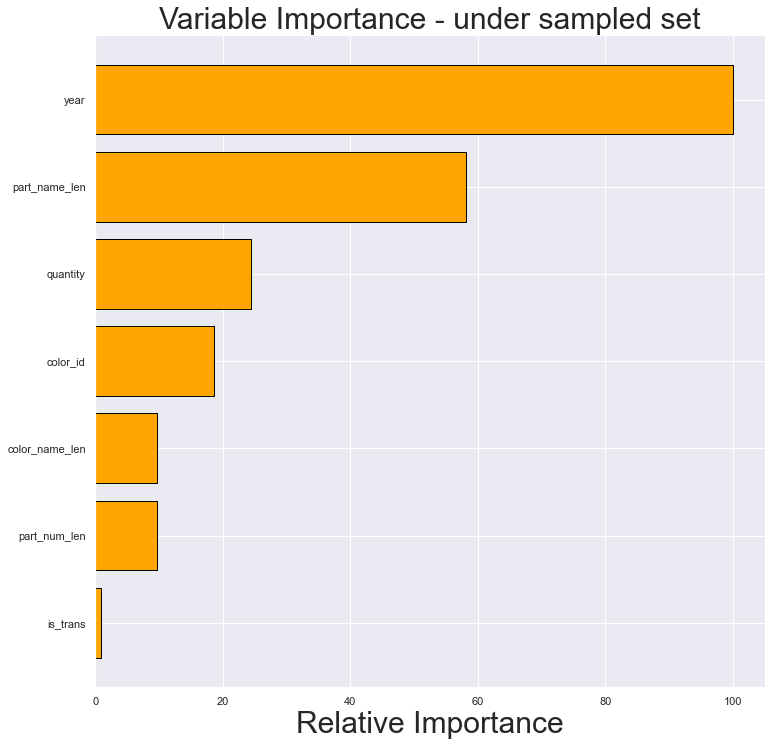

In [26]:
feature_importance = model_rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(12,12))
plt.barh(pos, feature_importance[sorted_idx], color='orange', edgecolor='black', align='center')
plt.yticks(pos, df_balancedbyunder[fn_under].columns[sorted_idx])
plt.xlabel('Relative Importance', fontsize=30)
plt.title('Variable Importance - under sampled set', fontsize=30)
plt.grid(True)
plt.show()

In [27]:
ht0 = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht0.csv')
ht_dfg_over = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_dfg_over.csv')

In [28]:
hyper_table = pd.concat([ht0, ht_dfg_over, ht_dfg_under])

In [29]:
hyper_table = hyper_table.sort_values('test_score', ascending=False)
hyper_table

,sample,desc,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test,last_feature
0,balanced,"['year', 'color_id', 'quantity', 'is_trans', '...",0.963242,0.960404,0.572650,0.036473,0.960404,0.068577,"RandomForestClassifier(n_estimators=200, n_job...",5,827359,91929,part_num_len
1,balanced,"['year', 'color_id', 'quantity', 'is_trans', '...",0.963242,0.960372,0.566524,0.035928,0.960372,0.067571,"RandomForestClassifier(n_estimators=200, n_job...",6,827359,91929,color_name_len
2,balanced,"['year', 'color_id']",0.961713,0.960285,0.645570,0.013881,0.960285,0.027178,"RandomForestClassifier(n_estimators=200, n_job...",2,827359,91929,color_id
3,balanced,"['year', 'color_id', 'quantity', 'is_trans']",0.962175,0.960100,0.535714,0.012248,0.960100,0.023949,"RandomForestClassifier(n_estimators=200, n_job...",4,827359,91929,is_trans
4,balanced,"['year', 'color_id', 'quantity']",0.962175,0.960089,0.529412,0.012248,0.960089,0.023943,"RandomForestClassifier(n_estimators=200, n_job...",3,827359,91929,quantity
5,balanced,['year'],0.961572,0.960034,0.000000,0.000000,0.960034,0.000000,"RandomForestClassifier(n_estimators=200, n_job...",1,827359,91929,year
6,balanced,"['year', 'color_id', 'quantity', 'is_trans', '...",0.968992,0.959773,0.486900,0.121394,0.959773,0.194336,"RandomForestClassifier(n_estimators=200, n_job...",7,827359,91929,part_name_len
0,over,"['year', 'color_id', 'quantity', 'is_trans', '...",0.885157,0.791698,0.120692,0.670114,0.791698,0.204545,"RandomForestClassifier(n_estimators=200, n_job...",7,1591130,91929,part_name_len
2,under,"['year', 'color_id', 'quantity']",0.572514,0.712811,0.060763,0.427872,0.712811,0.106414,LogisticRegression(),3,63588,91929,quantity
3,under,"['year', 'color_id', 'quantity', 'is_trans']",0.572514,0.712811,0.060763,0.427872,0.712811,0.106414,LogisticRegression(),4,63588,91929,is_trans


In [30]:
ht_dfg_under.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_dfg_under.csv', index=False)

In [31]:
hyper_table.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/hyper_table.csv', index=False)

In [32]:
hyper_table = list()

In [33]:
df.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'set_num_len',
       'set_name_len', 'theme_name', 'id', 'part_num', 'color_id', 'quantity',
       'color_name', 'part_name', 'is_trans', 'theme_name_len', 'part_num_len',
       'color_name_len', 'part_name_len', 'is_ninjago'],
      dtype='object')

In [34]:
target_names = 'set_num set_name theme_id num_parts set_num_len set_name_len theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()
target_names

['set_num',
 'set_name',
 'theme_id',
 'num_parts',
 'set_num_len',
 'set_name_len',
 'theme_name',
 'id',
 'part_num',
 'color_name',
 'part_name',
 'theme_name_len',
 'is_ninjago']

In [35]:
fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)
    
fn

['year',
 'color_id',
 'quantity',
 'is_trans',
 'part_num_len',
 'color_name_len',
 'part_name_len']

In [36]:
model_rf.fit(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])

s_train = model_rf.score(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_test = model_rf.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_rf.predict(df_test[fn])

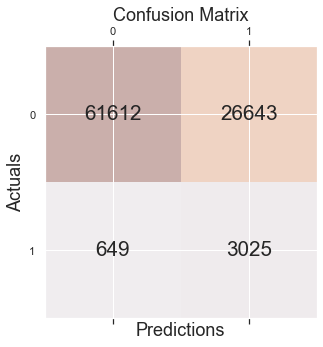

In [37]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [38]:
precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1 = f1_score(df_test['is_ninjago'], y_pred)

hyper_table.append(dict(sample='under', 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=df_balancedbyunder.shape[0], 
                    num_rows_test=df_test.shape[0])) 

In [39]:
model_XGB = XGBClassifier(random_state=1)
model_XGB.fit(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_train = model_XGB.score(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_test = model_XGB.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_XGB.predict(df_test[fn])
predictions = [round(value) for value in y_pred]

C:\Users\marki\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:37:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

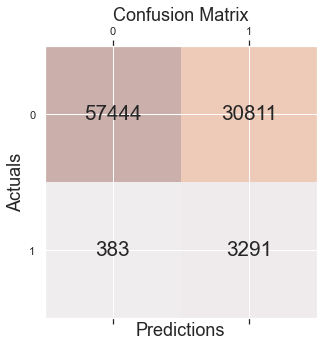

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [42]:
precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1 = f1_score(df_test['is_ninjago'], y_pred)

In [43]:
hyper_table.append(dict(sample='under', 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1,
                    model=model_XGB, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0])) 

In [44]:
model_XGB = XGBClassifier(n_estimators=200, max_depth=9, learning_rate=0.2, random_state=1)
model_XGB.fit(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_train = model_XGB.score(df_balancedbyunder[fn], df_balancedbyunder['is_ninjago'])
s_test = model_XGB.score(df_test[fn], df_test['is_ninjago'])
y_pred = model_XGB.predict(df_test[fn])
predictions = [round(value) for value in y_pred]

C:\Users\marki\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

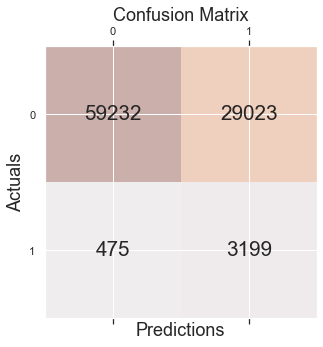

In [46]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [47]:
precision = precision_score(df_test['is_ninjago'], y_pred)
recall = recall_score(df_test['is_ninjago'], y_pred)
accuracy = accuracy_score(df_test['is_ninjago'], y_pred)
f1 = f1_score(df_test['is_ninjago'], y_pred)

In [48]:
hyper_table.append(dict(sample='under', 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1,
                    model=model_XGB, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0])) 

In [49]:
ht_fr_under = pd.DataFrame(hyper_table)
ht_fr_under

,sample,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test
0,under,0.895594,0.703119,0.101962,0.823353,0.703119,0.181453,"(DecisionTreeClassifier(max_features='auto', r...",7,63588,91929
1,under,0.793609,0.660673,0.096505,0.895754,0.660673,0.174238,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929
2,under,0.829795,0.679122,0.099280,0.870713,0.679122,0.178237,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929


In [50]:
ht_fr_under.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_fr_under.csv', index=False)

In [51]:
ht_fr_bal = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_fr_bal.csv')
ht_fr_over = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_fr_over.csv')

In [52]:
hyper_table = pd.concat([ht_fr_bal, ht_fr_over, ht_fr_under])

In [53]:
hyper_table = hyper_table.sort_values('test_score', ascending=False)
hyper_table

,sample,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test
0,balanced,0.844416,0.827247,0.130651,0.587643,0.827247,0.213773,RandomForestClassifier(class_weight='balanced'...,7,827359,91929
0,over,0.885157,0.791698,0.120692,0.670114,0.791698,0.204545,"RandomForestClassifier(n_estimators=200, n_job...",7,1591130,91929
1,24.918800045111087,0.744759,0.736253,0.112843,0.816004,0.736253,0.198267,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929
2,over,0.827438,0.718935,0.108769,0.838596,0.718935,0.192562,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929
0,under,0.895594,0.703119,0.101962,0.823353,0.703119,0.181453,"(DecisionTreeClassifier(max_features='auto', r...",7,63588,91929
2,under,0.829795,0.679122,0.099280,0.870713,0.679122,0.178237,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929
1,over,0.789296,0.677229,0.099612,0.880240,0.677229,0.178971,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929
1,under,0.793609,0.660673,0.096505,0.895754,0.660673,0.174238,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929


In [54]:
hyper_table = hyper_table.reset_index()
hyper_table

,index,sample,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test
0,0,balanced,0.844416,0.827247,0.130651,0.587643,0.827247,0.213773,RandomForestClassifier(class_weight='balanced'...,7,827359,91929
1,0,over,0.885157,0.791698,0.120692,0.670114,0.791698,0.204545,"RandomForestClassifier(n_estimators=200, n_job...",7,1591130,91929
2,1,24.918800045111087,0.744759,0.736253,0.112843,0.816004,0.736253,0.198267,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929
3,2,over,0.827438,0.718935,0.108769,0.838596,0.718935,0.192562,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929
4,0,under,0.895594,0.703119,0.101962,0.823353,0.703119,0.181453,"(DecisionTreeClassifier(max_features='auto', r...",7,63588,91929
5,2,under,0.829795,0.679122,0.099280,0.870713,0.679122,0.178237,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929
6,1,over,0.789296,0.677229,0.099612,0.880240,0.677229,0.178971,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929
7,1,under,0.793609,0.660673,0.096505,0.895754,0.660673,0.174238,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929


In [55]:
hyper_table = hyper_table.drop('index', axis=1)
hyper_table

,sample,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test
0,balanced,0.844416,0.827247,0.130651,0.587643,0.827247,0.213773,RandomForestClassifier(class_weight='balanced'...,7,827359,91929
1,over,0.885157,0.791698,0.120692,0.670114,0.791698,0.204545,"RandomForestClassifier(n_estimators=200, n_job...",7,1591130,91929
2,24.918800045111087,0.744759,0.736253,0.112843,0.816004,0.736253,0.198267,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929
3,over,0.827438,0.718935,0.108769,0.838596,0.718935,0.192562,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929
4,under,0.895594,0.703119,0.101962,0.823353,0.703119,0.181453,"(DecisionTreeClassifier(max_features='auto', r...",7,63588,91929
5,under,0.829795,0.679122,0.099280,0.870713,0.679122,0.178237,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929
6,over,0.789296,0.677229,0.099612,0.880240,0.677229,0.178971,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929
7,under,0.793609,0.660673,0.096505,0.895754,0.660673,0.174238,"XGBClassifier(base_score=0.5, booster='gbtree'...",7,827359,91929


In [56]:
hyper_table.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/hyper_table_final.csv', index=False)